# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [52]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [53]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))
Answer:
"medv" is the mwdian value of owner-occupied homes in $1000 while "dis" is the weighted mean of distance to five Boston employment centres.


_(ii)_ What concept ‘defines’ the plotted line?
Answer:
The plotted line is a regression line and also known as line of best fit between the response and predictor variables denoted by the formula y = ⨍(β_1 + Xβ_0)

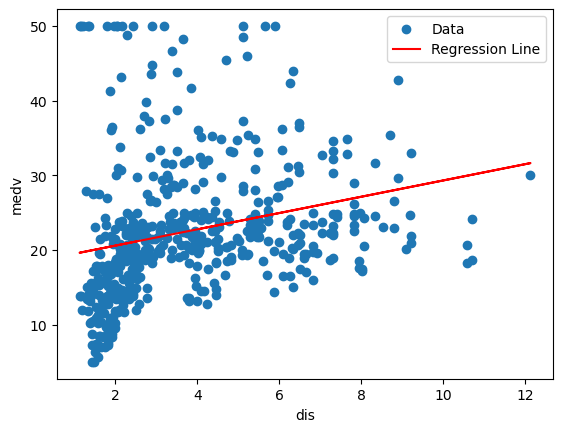

In [54]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
Answer:
Null Hypothesis: There is no relationship between 'dis', the predictor variable and 'medv' response variable denoted as 
H0 : β1 = 0
Alternate Hypothesis : There is a relationship between 'dis' the predictor variable and 'medv' the response variable  denoted as 
Ha : β1 ≠ 0

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [55]:
# Extract response and predictor variables and fit the model
X = Boston['dis']
Y = Boston['medv']
X = sm.add_constant(X)
model = sm.OLS(Y, X) # to specify the model
myresults = model.fit() # to fit the model

summarize(myresults)


c:\Users\klawa\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
const,18.3901,0.817,22.499,0.0
dis,1.0916,0.188,5.795,0.0


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
Answer: Coefficient for Intercept is 18.39 while slope is 1.09
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
Answer: The std_err for intercept and slope are 0.817 and 0.188 respectively.
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
Answer: The conf Int are 19.996 and 1.46 respectively.


In [56]:
# Your answer here
model_summ = myresults.summary()
coef_est= myresults.params
std_err = myresults.bse
conf_int = myresults.conf_int()

print(model_summ) 


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:12:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [57]:
print(coef_est) 

const    18.390088
dis       1.091613
dtype: float64


In [58]:
print(std_err)

const    0.817389
dis      0.188378
dtype: float64


In [59]:
print(conf_int)

               0          1
const  16.784179  19.995997
dis     0.721509   1.461717



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [60]:
Answers Viii:
Given a low R-squared value of 0.062, the model does not appear to be a good fit, and also suggest that 'dis' alone is not a strong predictor of the response Variable. Also, theres a 
large amount of variance in the response variable that is not explained by the predictor variable.
Answer iX: 
We will reject the null hypothesis because there is a strong statistical evidence to support the argument that 'dis' has a significant
effect on 'medv' given that the p-value is significantly below 0.05

SyntaxError: invalid syntax (1730774515.py, line 1)

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [ ]:
# Extract the response and predictor variables then fit the model
X = MS(['dis', 'rm']).fit_transform(Boston)
Y = Boston['medv']
X = sm.add_constant(X)
model1 = sm.OLS(Y, X) # to specify the model
myresults1 = model1.fit() # to fit the model

summarize(myresults1)

c:\Users\klawa\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
c:\Users\klawa\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,-34.6361,2.621,-13.212,0.000
dis,0.4888,0.141,3.459,0.001
rm,8.8014,0.424,20.780,0.000


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.
Answer:
Null Hypothesis: The predictor variables 'dis', 'rm' have no effect on 'medv' response variable denoted as 
H0 : βdis = 0 and βrm = 0
Alternate Hypothesis : At least one of the predictor variables  'dis' or 'rm' has an effect on the 'medv' the response variable  denoted as 
H1: βdis ≠ 0 or βrm ≠ 0 
_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?
Answer: 
The P-value of rm and dis are 0.000 and 0.001 and are less than 0.05 which indicates that both predictor variables is statistically significant in predicting the response variable.
_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?
Answer:
The residual vs fitted plot helps in identying outliers and shows there is a high residuals or outliers. Outliers can make our predictions less reliable by skewing the model understanding of the relationship between the varriables.

In [ ]:
# Add your code here
model_summ1 = myresults1.summary()

print(model_summ1) 

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        18:12:05   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.0

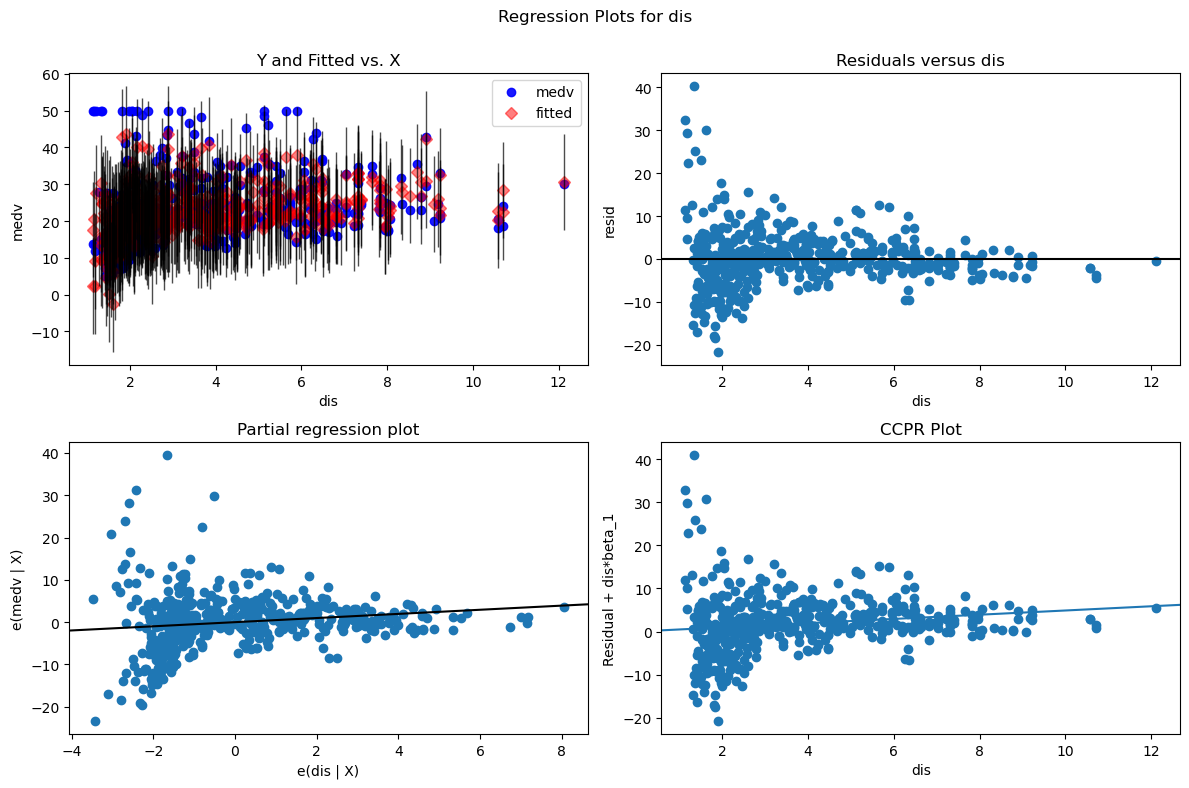

In [67]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog


fig = plt.figure(figsize=(12, 8))
plot_regress_exog(myresults1,'dis',fig=fig)
plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.
Answer:
The p-value of the interaction is less than 0.05 significant level and this makes the interaction statistically significant which suggest that the effect of 'dis' on 'mdev' varies depending on 'rm', and vice versa. 

In [ ]:
# Fitting a model for intraction between the predictor variables
model2 = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
result2 = model.fit()

# Print the summary of the regression
print(result2.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:07:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
